In [1]:
import math as m
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
def twodgaussian(params, shape=None):
    """
    Parameters
    ----------
    
    amp : Amplitude of gaussian
    x0 : Center of gaussian x
    y0 : Center of gaussian y
    cx : x axis width
    cy : y axis width
    pa : Rotation
    """
    amp, xo, yo, cx, cy, pa = params
    
    def gauss(y, x):
        st = m.sin(pa)**2
        ct = m.cos(pa)**2
        s2t = m.sin(2*pa)
        a = (ct/cx**2 + st/cy**2)/2
        b = s2t/4 *(1/cy**2-1/cx**2)
        c = (st/cx**2 + ct/cy**2)/2
        v = amp*np.exp(-1*(a*(x-xo)**2 + 2*b*(x-xo)*(y-yo) + c*(y-yo)**2))
        return v
    
    if shape is not None:
        return gauss(*np.indices(shape))
    else:
        return gauss



In [3]:
p1In = [40e-6, 50.0, 50.0, 2.0, 2.0, m.radians(60.0)]
p2In = [45e-6, 100.0, 100.0, 5.0, 5.0, m.radians(60.0)]
shape = (200, 200)
noiseFrac=0.2
nSamps = 200

xyData = twodgaussian(p1In, shape)
xyData += twodgaussian(p2In, shape)

xyData += (np.random.random(xyData.shape) - 0.5) * 4e-6

def randRange(st, en):
    arr = np.random.random(nSamps) * (en - st)
    sample = st + np.array(np.round(arr), dtype='int')
    return sample

def sample(xst, xen, yst, yen, nSamps):
    X = randRange(xst, xen)
    Y = randRange(yst, yen)

    Z = xyData[Y, X]

    return (X, Y, Z)

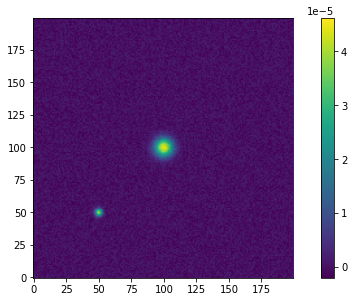

In [4]:
fig = plt.figure(figsize=(8, 4.3))

ax1 = fig.add_subplot(1, 1, 1)
im1 = ax1.imshow(xyData, origin='lower', cmap='viridis')
cbar1 = fig.colorbar(im1)
ax1.set_aspect('equal')

plt.tight_layout(w_pad=2)
plt.show()

In [5]:
def fit_gaussian(xst, xen, yst, yen, p0):
#     xst, xen, yst, yen = 80, 120, 80, 120

    nSamps = 200
    X, Y, Z = sample(xst, xen, yst, yen, nSamps)
    p1, success = optimize.leastsq(lambda p: twodgaussian(p)(*[Y, X]) - Z, p0)
    print(p1)
    fit_res = twodgaussian(p1, shape)

    fig = plt.figure(figsize=(8, 4.3))

    ax1 = fig.add_subplot(1, 2, 1)
    im1 = ax1.imshow(xyData[xst:xen, yst:yen], origin='lower', cmap='viridis')
    cbar1 = fig.colorbar(im1)
    ax1.set_aspect('equal')

    ax2 = fig.add_subplot(1, 2, 2)
    im2 = ax2.imshow(fit_res, origin='lower', cmap='viridis')
    fig.colorbar(im2)
    ax2.set_aspect('equal')

    plt.tight_layout(w_pad=2)
    plt.show()
    
    return fit_res


[3.96767993e-05 5.00429109e+01 4.99553541e+01 1.93821005e+00
 2.03106412e+00 7.63964291e-02]


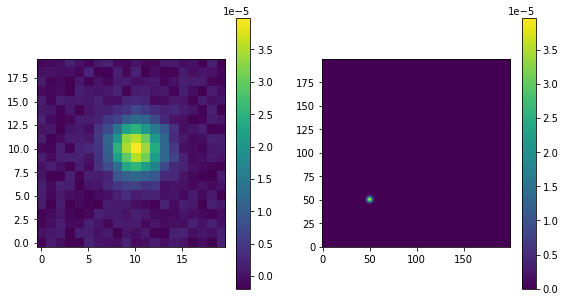

[4.51930063e-05 1.00150991e+02 1.00002666e+02 4.95269939e+00
 4.99539324e+00 4.03408078e-01]


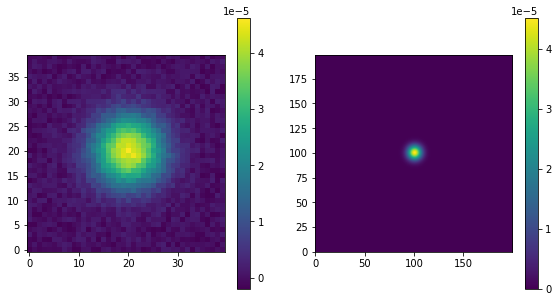

In [6]:
# Fitting 1
fit_1 = fit_gaussian(40, 60, 40, 60, p0 = [20e-6, 50.0, 50.0, 2.0, 2.0, m.radians(0.0)])
fit_2 = fit_gaussian(80, 120, 80, 120, p0 = [10e-6, 100.0, 100.0, 1.0, 1.0, m.radians(0.0)])

# p1In = [40e-6, 50.0, 50.0, 2.0, 2.0, m.radians(60.0)]
# p2In = [45e-6, 100.0, 100.0, 5.0, 5.0, m.radians(60.0)]

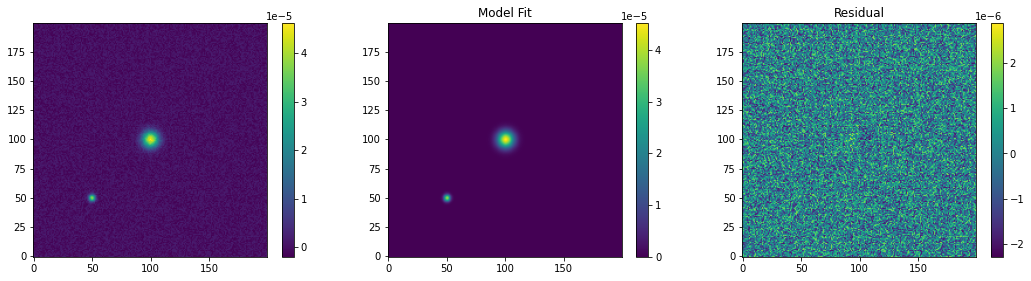

In [7]:
xyDataFit = fit_1 + fit_2

fig = plt.figure(figsize=(18, 4.3))

ax1 = fig.add_subplot(1, 3, 1)
im1 = ax1.imshow(xyData, origin='lower', cmap='viridis')
cbar1 = fig.colorbar(im1)
ax1.set_aspect('equal')

ax2 = fig.add_subplot(1, 3, 2)
im2 = ax2.imshow(xyDataFit, origin='lower', cmap='viridis')
cbar2 = fig.colorbar(im2)
ax2.set_title("Model Fit")

ax3 = fig.add_subplot(1, 3, 3)
xyDataRes = xyData - xyDataFit
im3 = ax3.imshow(xyDataRes, origin='lower', cmap='viridis')
cbar3 = fig.colorbar(im3)
ax3.set_title("Residual")
# ax1.scatter(X, Y)

plt.show()